# Producto Integrador de Aprendizaje

Tuesday N4-N6
*   Diego Alcántara Martínez 2005282
*   Javier Alejandro Aguilar Espinosa 1877572
*   Víctor Jahaziel Garza Muñoz 2001180
*   Diego Tovias Canizales 1994490

**Import Libraries**

In [19]:
# ============================
# System and File Management Libraries
# ============================
import os
import zipfile
import glob
from imutils import paths
from PIL import Image

# ============================
# Data Processing Libraries
# ============================
import numpy as np
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as metrics

# ============================
# Visualization Libraries
# ============================
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# Deep Learning Libraries (TensorFlow/Keras)
# ============================
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Input, Dense, Flatten, AveragePooling2D, Dropout,
    BatchNormalization, Conv2D
)

# ============================
# External Libraries
# ============================
import kagglehub



**Import Dataset**

Our dataset is based on Blood Cells for Acute Lymphoblastic Leukemia detection. The dataset can be viewed in the next link: [Blood Cells Cancer](https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class)

In [2]:
!kaggle datasets download -d mohammadamireshraghi/blood-cell-cancer-all-4class

Dataset URL: https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 1.67G/1.68G [00:22<00:00, 164MB/s]
100% 1.68G/1.68G [00:22<00:00, 78.5MB/s]


In [3]:
zipfile = zipfile.ZipFile('/content/blood-cell-cancer-all-4class.zip')
zipfile.extractall('/content')
zipfile.close()

**Preprocessing**

In [4]:
import os
from PIL import Image

benign_dir = '/content/Blood cell Cancer [ALL]/Benign'
preB_dir = '/content/Blood cell Cancer [ALL]/[Malignant] Pre-B'
proB_dir = '/content/Blood cell Cancer [ALL]/[Malignant] Pro-B'
earlyPre_B_dir = '/content/Blood cell Cancer [ALL]/[Malignant] early Pre-B'

directories = [
    ("Benign", benign_dir),
    ("Pre-B", preB_dir),
    ("Pro-B", proB_dir),
    ("Early Pre-B", earlyPre_B_dir)
]

def find_resolutions(directory):
    min_resolution = None
    max_resolution = None

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with Image.open(file_path) as img:
                resolution = img.size
                if min_resolution is None or resolution < min_resolution:
                    min_resolution = resolution
                if max_resolution is None or resolution > max_resolution:
                    max_resolution = resolution
        except Exception as e:
            print(f"Error al procesar {file_path}: {e}")

    return min_resolution, max_resolution

for name, dir_path in directories:
    if os.path.exists(dir_path):
        min_res, max_res = find_resolutions(dir_path)
        print(f"Directorio: {name}")
        print(f"  Resolución mínima: {min_res}")
        print(f"  Resolución máxima: {max_res}")
    else:
        print(f"El directorio {name} no existe: {dir_path}")


Directorio: Benign
  Resolución mínima: (1024, 768)
  Resolución máxima: (2560, 1920)
Directorio: Pre-B
  Resolución mínima: (1024, 768)
  Resolución máxima: (1024, 768)
Directorio: Pro-B
  Resolución mínima: (1024, 768)
  Resolución máxima: (2560, 1920)
Directorio: Early Pre-B
  Resolución mínima: (1024, 768)
  Resolución máxima: (1024, 768)


In [5]:
import cv2
import os
import matplotlib.pyplot as plt

directories = ['/content/Blood cell Cancer [ALL]/Benign', '/content/Blood cell Cancer [ALL]/[Malignant] Pre-B', '/content/Blood cell Cancer [ALL]/[Malignant] Pro-B', '/content/Blood cell Cancer [ALL]/[Malignant] early Pre-B']  # Cambia las rutas según tus necesidades

for directory in directories:
    if not os.path.exists(directory):
        print(f"Error: El directorio {directory} no existe.")
        continue

    print(f"Procesando imágenes en el directorio: {directory}")

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image = cv2.imread(file_path, cv2.IMREAD_ANYCOLOR)



Procesando imágenes en el directorio: /content/Blood cell Cancer [ALL]/Benign
Procesando imágenes en el directorio: /content/Blood cell Cancer [ALL]/[Malignant] Pre-B
Procesando imágenes en el directorio: /content/Blood cell Cancer [ALL]/[Malignant] Pro-B
Procesando imágenes en el directorio: /content/Blood cell Cancer [ALL]/[Malignant] early Pre-B


In [6]:
import cv2
import os
import matplotlib.pyplot as plt

directories = ['/content/Blood cell Cancer [ALL]/Benign', '/content/Blood cell Cancer [ALL]/[Malignant] Pre-B', '/content/Blood cell Cancer [ALL]/[Malignant] Pro-B', '/content/Blood cell Cancer [ALL]/[Malignant] early Pre-B']
output_directory = '/content/Numeros'
os.makedirs(output_directory, exist_ok=True)
processed_images = []

# Iterate over each directory
for directory in directories:
    if not os.path.exists(directory):
        print(f"Error: El directorio {directory} no existe.")
        continue

    print(f"Procesando imágenes en el directorio: {directory}")

# Loop through all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image = cv2.imread(file_path, cv2.IMREAD_ANYCOLOR)

            if image is None:
                print(f"Error: No se pudo cargar la imagen {filename} en {directory}.")
            else:
                img_resized = cv2.resize(image, (244, 244))

                img_resized = cv2.bitwise_not(img_resized)

                processed_images.append(img_resized)

                output_path = os.path.join(output_directory, f"processed_{filename}")
                cv2.imwrite(output_path, img_resized)

print(f"Total de imágenes procesadas: {len(processed_images)}")


Procesando imágenes en el directorio: /content/Blood cell Cancer [ALL]/Benign
Procesando imágenes en el directorio: /content/Blood cell Cancer [ALL]/[Malignant] Pre-B
Procesando imágenes en el directorio: /content/Blood cell Cancer [ALL]/[Malignant] Pro-B
Procesando imágenes en el directorio: /content/Blood cell Cancer [ALL]/[Malignant] early Pre-B
Total de imágenes procesadas: 3242


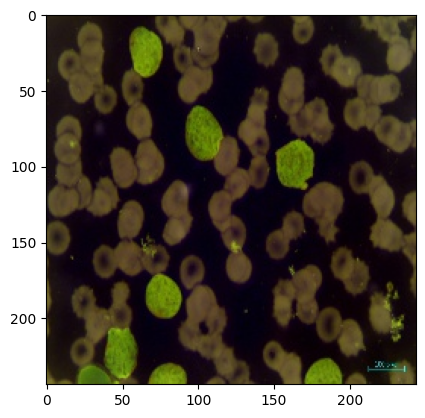

In [7]:
import cv2
import matplotlib.pyplot as plt

image1_path = '/content/Numeros/processed_Snap_177 - Copy.jpg'
image1 = cv2.imread(image1_path) # Read the image data using cv2.imread
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

plt.imshow(image1)
plt.show()

In [8]:
import os
import random
import shutil
import cv2
import numpy as np

# List of directories containing images
directories = ['/content/Blood cell Cancer [ALL]/Benign', '/content/Blood cell Cancer [ALL]/[Malignant] Pre-B', '/content/Blood cell Cancer [ALL]/[Malignant] Pro-B', '/content/Blood cell Cancer [ALL]/[Malignant] early Pre-B']  # Cambia las rutas según tus necesidades
output_directory_train = '/content/temp/train'
output_directory_test = '/content/temp/test'

os.makedirs(output_directory_train, exist_ok=True)
os.makedirs(output_directory_test, exist_ok=True)

def split_data(directory, train_dir, test_dir, split_ratio=0.8):
    # Ready to store images
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

    # Shuffle the images randomly
    random.shuffle(image_files)

    # Calculate the number of images for training (80%)
    train_size = int(len(image_files) * split_ratio)

    # Split images into training and validation
    train_images_paths = image_files[:train_size]
    test_images_paths = image_files[train_size:]

    # Move the images to the right directories
    for image in train_images_paths:
        shutil.copy(os.path.join(directory, image), os.path.join(train_dir, image))
    for image in test_images_paths:
        shutil.copy(os.path.join(directory, image), os.path.join(test_dir, image))

    return train_images_paths, test_images_paths # Return the paths

train_images_paths = []
test_images_paths = []
for directory in directories:
    if not os.path.exists(directory):
        print(f"Error: El directorio {directory} no existe.")
        continue

    print(f"Dividiendo imágenes del directorio: {directory}")
    # Get the paths from split_data
    train_paths, test_paths = split_data(directory, output_directory_train, output_directory_test)
    train_images_paths.extend(train_paths)  # Extend the lists with paths
    test_images_paths.extend(test_paths)

print("División completada: 80% para training y 20% para testing.")

# Load and preprocess images using the paths, resizing to a common shape
IMG_SIZE = 64  # Choose a common size for all images

train_images = [cv2.resize(cv2.imread(os.path.join(output_directory_train, path), cv2.IMREAD_ANYCOLOR), (IMG_SIZE, IMG_SIZE)) for path in train_images_paths]
test_images = [cv2.resize(cv2.imread(os.path.join(output_directory_test, path), cv2.IMREAD_ANYCOLOR), (IMG_SIZE, IMG_SIZE)) for path in test_images_paths]

# Convert to NumPy arrays and normalize
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0

train_labels = np.array([0] * len(train_images_paths))  # Placeholder, replace with actual labels
test_labels = np.array([0] * len(test_images_paths))


X = np.concatenate((train_images, test_images))

# Concatenate train_labels and test_labels into a single label set
y = np.concatenate((train_labels, test_labels))

y_train = train_labels
y_test = test_labels

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)


Dividiendo imágenes del directorio: /content/Blood cell Cancer [ALL]/Benign
Dividiendo imágenes del directorio: /content/Blood cell Cancer [ALL]/[Malignant] Pre-B
Dividiendo imágenes del directorio: /content/Blood cell Cancer [ALL]/[Malignant] Pro-B
Dividiendo imágenes del directorio: /content/Blood cell Cancer [ALL]/[Malignant] early Pre-B
División completada: 80% para training y 20% para testing.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

**Model and Training**

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Forma de X_train: (2593, 64, 64, 3)
Forma de y_train: (2593,)
Forma de X_test: (649, 64, 64, 3)
Forma de y_test: (649,)


In [12]:
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the labels and transform them to numerical labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert numerical labels to one-hot encoded format
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc}')

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 1.0000 - loss: 0.0409 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 239ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 214

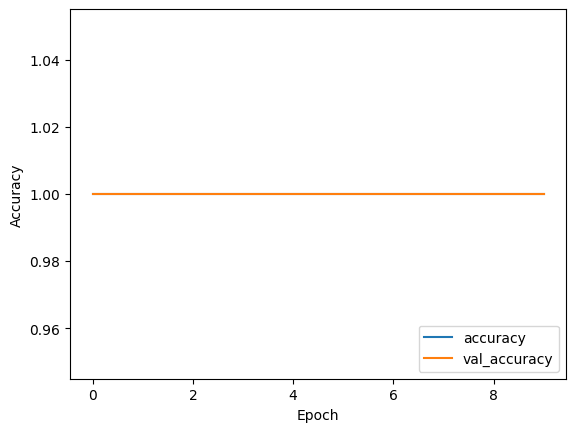

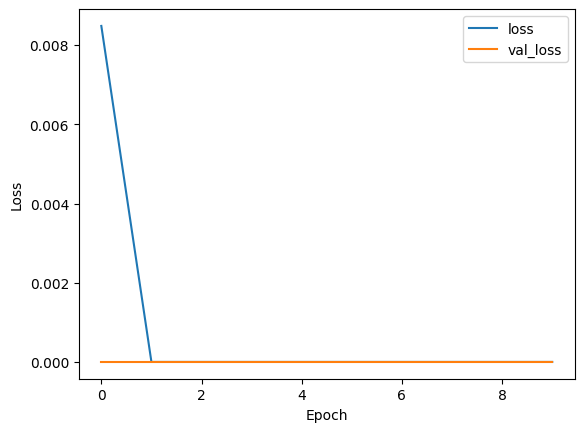

In [14]:
# Plot Acurracy & Losses
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

**Testing & Predictions**

In [15]:
# Realizar predicciones
predictions = model.predict(X_test)

label_map = {0: 'Benign', 1: 'Malignant'}

# Función para graficar la imagen y las predicciones
def plot_image(i, predictions_array, true_label, img):
    true_label, img = np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.astype("uint8"))

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        label_map[predicted_label],
        100 * np.max(predictions_array),
        label_map[true_label]),
        color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(len(label_map)))
    plt.yticks([])
    thisplot = plt.bar(range(len(label_map)), predictions_array, color="#777777")
    plt.ylim([0, 1])

    # Resaltar en rojo la predicción y en azul la verdadera
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

In [ ]:
x = predictions[1]
y = test_labels[1]
print(f"La red dice que la imagen es clase {x} y la clase verdadera es: {y}")

**Results**

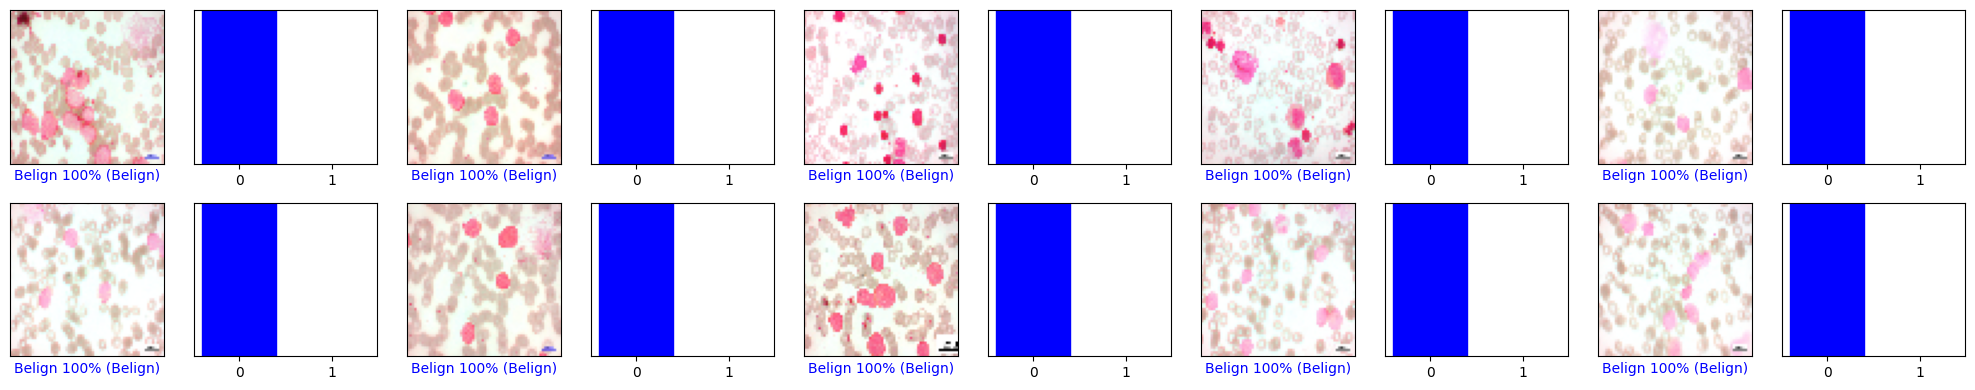

In [20]:
X_test_reshaped = X_test.reshape(-1, 64, 64, 3)
X_test_reshaped = (X_test_reshaped * 255).astype("uint8")

label_map = {0: 'Belign', 1: 'Malignant'}
num_rows = 2
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test_reshaped)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()
